Index: 190098M
Name: CHAMARA RPO
EX08

[[ 4.80251845e+01  1.44011271e+03 -5.71648932e+02  7.53293366e+01]
 [ 1.53577034e+03 -6.41434324e+01 -1.63127843e+02  1.85810055e+02]
 [ 4.88387837e-02 -1.81568392e-01 -9.82164799e-01  6.14604846e-01]]


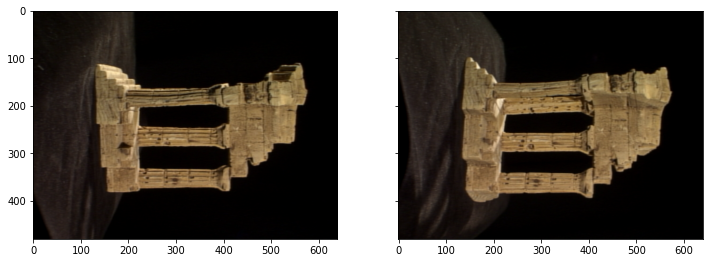

In [23]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,2,sharex='all',sharey='all',figsize=(12,6))
f = open(r'templeSparseRing/templeSR_par.txt')
assert f is not None
n = int(f.readline())
l = f.readline().split()
im1_fn =l[0]
K1 = np.array([float(i) for i in l[1:10]]).reshape((3,3))
R1 = np.array([float(i) for i in l[10:19]]).reshape((3,3))
t1 = np.array([float(i) for i in l[19:22]]).reshape((3,1))
#Reading information on the second image
l = f.readline().split()
im2_fn =l[0]
K2 = np.array([float(i) for i in l[1:10]]).reshape((3,3))
R2 = np.array([float(i) for i in l[10:19]]).reshape((3,3))
t2 = np.array([float(i) for i in l[19:22]]).reshape((3,1))

#Read the two images and show
im1 = cv.imread(r'templeSparseRing/'+im1_fn,cv.IMREAD_COLOR)
im2 = cv.imread(r'templeSparseRing/'+im2_fn,cv.IMREAD_COLOR)
assert im1 is not None
assert im2 is not None
ax[0].imshow(cv.cvtColor(im1,cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(im2,cv.COLOR_RGB2BGR))
# compute p1 and p2
P1 = K1@np.hstack((R1,t1))
P2 = K2@np.hstack((R2,t2))
print(P1)
#computer F

#compute the epipolar line corresponding to the givent x and plot
 

In [20]:
from scipy.linalg import null_space
def skew(x):
    x = x.ravel()
    return np.array([[0,-x[2],x[1]],[x[2],0,-x[0]],[-x[1],x[0],0]])
C = null_space(P1)
C = C*np.sign(C[0,0])
e2 = P2@C
e2x = skew(e2)
F = e2x@ P2 @ np.linalg.pinv(P1)
F

array([[-2.87071497e-04, -3.96261289e-02,  2.94221686e+02],
       [-3.55039713e-02,  1.65329260e-04,  1.78860854e+01],
       [-2.76702814e+02,  2.12942175e+01, -9.06669374e+03]])

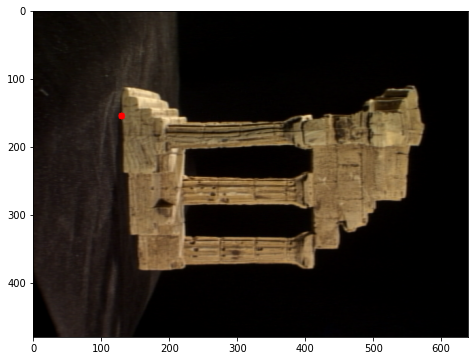

In [27]:
fig,ax=plt.subplots(1,1,sharex='all',sharey='all',figsize=(12,6))
x = np.array([130,155,1])
cv.circle(im1,(x[0],x[1]),5,(0,0,255),-1)
ax.imshow(cv.cvtColor(im1,cv.COLOR_RGB2BGR))


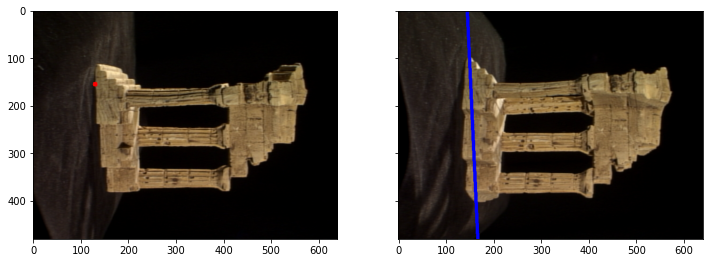

In [29]:
fig,ax=plt.subplots(1,2,sharex='all',sharey='all',figsize=(12,6))
l2 = F@x.T
p1 = np.array([0,(l2[0]*0+l2[2])/l2[1]]).astype(int)
p2 = np.array([500,(l2[0]*500+l2[2])/l2[1]]).astype(int)
cv.line(im2,(p1[0],p1[1]),(p2[0],p2[1]),(255,0,0),5)
ax[0].imshow(cv.cvtColor(im1,cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(im2,cv.COLOR_RGB2BGR))